In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Imported basic libraries!")

Imported basic libraries!


In [2]:
#!python -m pip uninstall webdriver-manager --yes

In [3]:
#pip install --upgrade webdriver-manager

In [5]:
## scraping
from webdriver_manager.chrome import ChromeDriverManager

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.remote.webelement import WebElement
import selenium.webdriver.support.ui as ui
import selenium.webdriver.support.expected_conditions as EC
import time
import os
import random
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

driver = webdriver.Chrome(ChromeDriverManager().install())

print("Successfully imported Selenium library!")

C:\Users\user\AppData\Local\Temp/ipykernel_18040/2379157825.py:17: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


Successfully imported Selenium library!


In [15]:
driver.get(gart_reviews)

## Scrape ServiceNow Reviews

Here I will use Selenium to scrape the first 10 pages of ServiceNow reviews on Gartner. We will take the title, review (shortened) and rating of these reviews. Our goal here is to find key words and plot a wordmap showing the most common words used by reviewers when talking about SN's offerings.

In [51]:
#driver.find_elements(By.XPATH, '//*[@id="body-container"]/div/div[2]/div/div[4]/ul/li[12]/div/div[2]')
lst_review = []
lst_title = []
lst_rating = []
#name = driver.find_elements(By.XPATH, '//*[@id="body-container"]/div/div[2]/div/div[4]/ul/li[12]/div/div[2]')
for j in range(1, 11):
    gart_reviews =  "https://www.gartner.com/reviews/market/it-service-management-platforms/vendor/servicenow/product/servicenow-service-management/reviews?marketSeoName=it-service-management-platforms&vendorSeoName=servicenow&productSeoName=servicenow-service-management&sort=-review_date&pageNum=" + str(j)
    driver.get(gart_reviews)
    review = driver.find_elements(By.XPATH, "//div[@class='uxd-truncate-text']")
    rating = driver.find_elements(By.XPATH, "//div[@class='ratingNumber']")
    title_h = driver.find_elements(By.XPATH, "//h3[@class='review-headline']")
    for i in range(len(review)):
        lst_review.append(review[i].text)
        lst_rating.append(rating[i].text)
        lst_title.append(title_h[i].text)

In [54]:
len(lst_review)

150

In [57]:
df = pd.DataFrame(columns=['Title', 'Review', 'Rating'])
print(df)

Empty DataFrame
Columns: [Title, Review, Rating]
Index: []


In [58]:
df['Title'] = lst_title
df['Review'] = lst_review
df['Rating'] = lst_rating

In [59]:
df.head()

,Title,Review,Rating
0,Efficient and powerfull tool,ITSM help our IT proccess in company. Our proc...,4.3
1,"ITSM is Rockstar, and Key Value delivery agent...",ServiceNow's ITSM Solution is one of the most ...,5.0
2,SNOW- Best ticketing tool,"Best tool for ITSM, and IT operations Helps GS...",5.0
3,ServiceNow - the obvious ITSM choice,ITSM is best experienced on servicenow. The to...,4.0
4,"You won't regret ServiceNow ITSM, but you prob...","ServiceNow ITSM is your standard, run-of-the-m...",5.0


In [60]:
df.dtypes

Title     object
Review    object
Rating    object
dtype: object

In [61]:
df[['Rating']] = df[['Rating']].apply(pd.to_numeric)
print(df.dtypes)

Title      object
Review     object
Rating    float64
dtype: object


## Preparing the text
Obviously stop words such as "and" etc will add nothing to our analysis. Here we will use NLP to remove stop words to cut down our text to more relevant and insightful text for what we are trying to achieve.

In [62]:
# import stopword removal library
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [66]:
df['Review_NoStopWords'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Title_NoStopWords'] = df['Title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [95]:
df["Review_NoStopWords"] = df['Review_NoStopWords'].str.replace('[^\w\s]','')
df["Title_NoStopWords"] = df['Title_NoStopWords'].str.replace('[^\w\s]','')

df['Review_NoStopWords'] = df['Review_NoStopWords'].str.lower()
df['Title_NoStopWords'] = df['Title_NoStopWords'].str.lower()

C:\Users\user\AppData\Local\Temp/ipykernel_18040/315386743.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Review_NoStopWords"] = df['Review_NoStopWords'].str.replace('[^\w\s]','')
C:\Users\user\AppData\Local\Temp/ipykernel_18040/315386743.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Title_NoStopWords"] = df['Title_NoStopWords'].str.replace('[^\w\s]','')


In [67]:
df.head()

,Title,Review,Rating,Review_NoStopWords,Title_NoStopWords
0,Efficient and powerfull tool,ITSM help our IT proccess in company. Our proc...,4.3,ITSM help IT proccess company. Our proccess ge...,Efficient powerfull tool
1,"ITSM is Rockstar, and Key Value delivery agent...",ServiceNow's ITSM Solution is one of the most ...,5.0,ServiceNow's ITSM Solution one seamless produc...,"ITSM Rockstar, Key Value delivery agent Servic..."
2,SNOW- Best ticketing tool,"Best tool for ITSM, and IT operations Helps GS...",5.0,"Best tool ITSM, IT operations Helps GSD focuse...",SNOW- Best ticketing tool
3,ServiceNow - the obvious ITSM choice,ITSM is best experienced on servicenow. The to...,4.0,ITSM best experienced servicenow. The tool all...,ServiceNow - obvious ITSM choice
4,"You won't regret ServiceNow ITSM, but you prob...","ServiceNow ITSM is your standard, run-of-the-m...",5.0,"ServiceNow ITSM standard, run-of-the-mill tick...","You regret ServiceNow ITSM, probably love"


Text(0.5, 1.0, 'Latest 150 Reviews Ratings for ServiceNow Gartner')

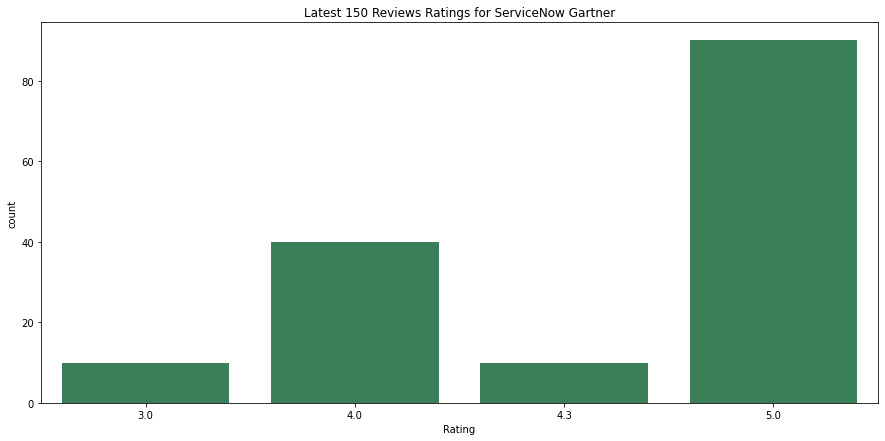

In [79]:
fig, ax = plt.subplots(figsize=[15, 7])
cols = ['orange' if x < 4.0 else 'seagreen' for x in df.Rating]
sn_rate = sns.countplot(x = df.Rating, ax = ax, palette = cols)
sn_rate.set_title("Latest 150 Reviews Ratings for ServiceNow Gartner")

## Now let's try measure word sentiment/plot a wordmap of powerful words in reviews

In [82]:
from textblob import TextBlob

In [96]:
len(df)

150

In [97]:
pos_word_list = []
neg_word_list = []
neu_word_list = []
for i in range(len(df)):
    line = df['Review_NoStopWords'][i].split()
    for word in line:
        testimonial = TextBlob(word)
        ## this should find every instance - no duplicates, we want duplicates for our wordcloud
        if testimonial.sentiment.polarity >= 0.5:
            pos_word_list.append(word)
        elif testimonial.sentiment.polarity <= -0.5:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)

In [100]:
len(pos_word_list)

120

In [120]:
#pos_word_list

In [101]:
# no overwhelmingly negative words
len(neg_word_list)

0

In [102]:
## now lets plot the wordcloud
!pip install wordcloud

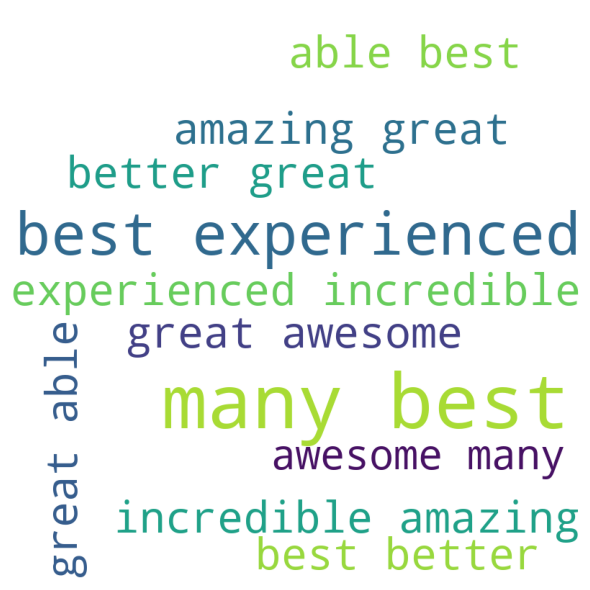

In [125]:
from wordcloud import WordCloud, STOPWORDS

comment_words = " ".join(str(x) for x in pos_word_list)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', repeat = False).generate_from_text(comment_words)
 
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

There are duplicates in our plot, let's refine our plot further.

In [128]:
d = {}
for i in range(len(pos_word_list)):
    if pos_word_list[i] not in d:
        d[pos_word_list[i]] = 1
    else:
        d[pos_word_list[i]] += 1

In [129]:
d

{'many': 10,
 'best': 30,
 'experienced': 10,
 'incredible': 10,
 'amazing': 10,
 'great': 20,
 'able': 10,
 'better': 10,
 'awesome': 10}

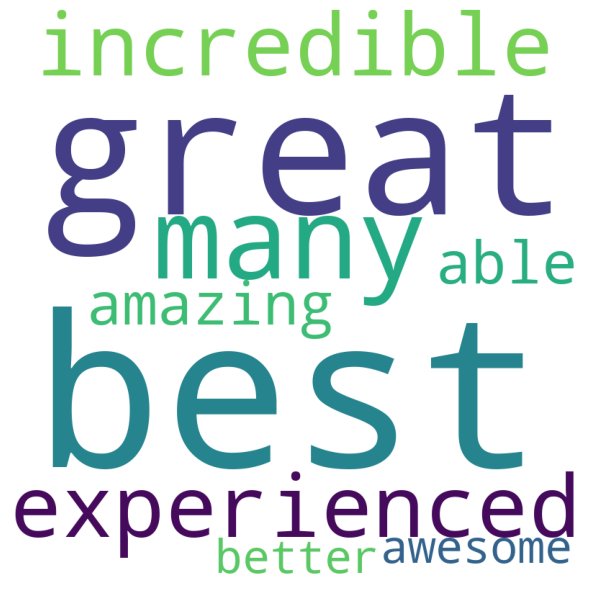

In [131]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white', repeat = False).generate_from_frequencies(frequencies=d)
 
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## Comments on Wordcloud

As we can see from our data cleaning/sentiment analysis there is next to no explicitly negative sentiment expressed in reviews on Gartner about ServiceNow. Looking at our final wordcloud plot above, we can see the use of "best" features heavily in reviews related to SN, which indicates users high levels of satisfaction with the products they are provided by SN.